In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
# Data files are stored in
DATA_DIR_RED = "Data/Red_20x5_25%/"
DATA_DIR_BLUE = "Data/Blue_20x5_25%/"

In [2]:
Operando_red_path = f'{DATA_DIR_RED}Spectra_Operando.txt'
Electric_red_path = f'{DATA_DIR_RED}V_A_3_cycles.txt'

class DataAnalysis:
    def __init__(self, path):
        if path[-5] == 'o':
            with open(path, 'r') as file:
                self.dict = {}
                self.dict['time'] = []
                self.dict['wave'] = []
                self.dict['counts'] = []
                for row in file:
                    if row == '\n':
                        continue
                    if row[0].isspace():
                        wave = row.split('\t')[1:]
                        wave = [float(wavenumber) for wavenumber in wave]
                        self.dict['wave']=wave
                    if row[0].isnumeric():
                        rowi = row.split('\t')
                        self.dict['time'].append(float(rowi[0]))
                        counts = [float(count) for count in rowi[1:]]
                        self.dict['counts'].append(counts)
        if path[-5] == 's':
            with open(path, 'r') as file:
                self.dict = {}
                self.dict['time'] = []
                self.dict['volt'] = []
                self.dict['current'] = []
                for row in file:
                    if row[0].isnumeric():
                        rowi = row.split('\t')
                        self.dict['time'].append(float(rowi[0]))
                        self.dict['volt'].append(float(rowi[1]))
                        self.dict['current'].append(float(rowi[2]))

    def get_time(self):
        return np.array(self.dict['time'])
    
    def get_wave(self):
        return np.array(self.dict['wave'])
    
    def get_counts(self):
        return np.array(self.dict['counts'])
    
    def get_volt(self):
        return np.array(self.dict['volt'])
    
    def get_current(self):
        return np.array(self.dict['current'])
    
    def set_counts(self, counts_path):
        maxrows = len(self.dict['time'])
        counter = 0
        self.dict['counts'] = []
        with open(counts_path, 'r') as file:
            skip_first = True
            for row in file:
                if skip_first:
                    skip_first = False
                    continue 
                rowi = row.split('\t')
                counts = [float(count) for count in rowi]
                self.dict['counts'].append(counts)
                counter += 1
                if maxrows==counter:
                    break


Operando_red = DataAnalysis(Operando_red_path)
Electric_red = DataAnalysis(Electric_red_path)

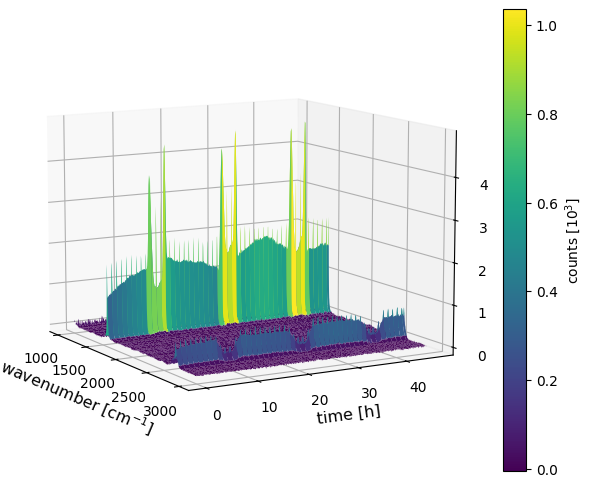

In [3]:
start = 0
fin = -1
t = Operando_red.get_time()/3600
nu = Operando_red.get_wave()[start:fin]
nu_grid, t_grid = np.meshgrid(nu, t)
counts_grid = np.array(Operando_red.get_counts())[:, start:fin]
xticks = np.arange(1000, 3500, 500)
yticks = np.arange(0, 41, 10)
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(nu_grid, t_grid, counts_grid/1000, cmap='viridis')
fig.colorbar(surf, label=r'counts [$10^3$]')
ax.view_init(elev=10, azim=-30)
plt.xlabel(r'wavenumber [cm$^{-1}$]', fontsize=11.5)
plt.ylabel(r'time [h]', fontsize=11.5)
plt.xticks(xticks, fontsize=10)
plt.yticks(yticks, fontsize=10)
plt.show()

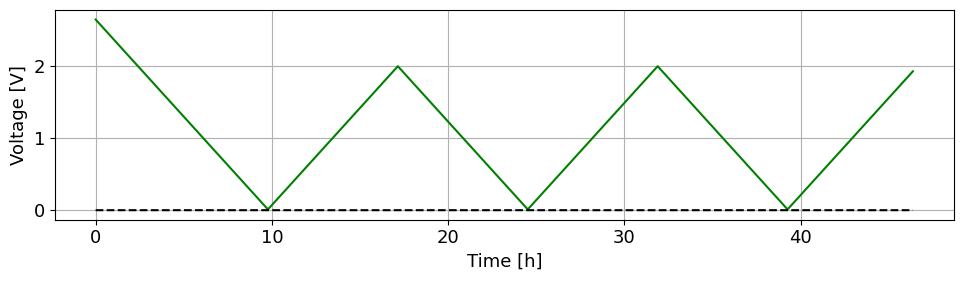

In [4]:
lim_ind = 200
splt_ind = 400
move_split1 = 350
move_split2 = 120
start_ind = 240
end_ind = -120
current = Electric_red.get_current()[:-lim_ind]
voltage = Electric_red.get_volt()[:-lim_ind]
vmax_ind = np.array([np.argmax(np.abs(voltage)[1000:6000])+1000, np.argmax(np.abs(voltage)[7000:20000])+7000, np.argmax(np.abs(voltage)[20000:-1])+20000])
charged_ind = np.array([np.argmin(np.abs(current)[400:4000])+400, np.argmin(np.abs(current)[7000:15000])+7000, np.argmin(np.abs(current)[20000:30000])+20000])
discharged_ind = np.array([np.argmin(np.abs(current)[4000:7000])+4000, np.argmin(np.abs(current)[15000:20000])+15000, len(current)-1])
time = Electric_red.get_time()[:-lim_ind]
time_charged = np.array([time[charged_ind[0]], time[charged_ind[1]], time[charged_ind[2]]])
time_discharged = np.array([time[discharged_ind[0]], time[discharged_ind[1]], time[discharged_ind[2]]])


plt.rcParams['font.size'] = 13
plt.figure(figsize=(10,3))
plt.plot(time/3600, voltage, color='green')
plt.plot(time/3600, [0]*len(time), color='black', linestyle='--')
plt.ylabel(r'Voltage [V]')
plt.xlabel(r'Time [h]')
plt.grid()
plt.tight_layout()
#plt.savefig(f'{DATA_DIR_RED}VoltageControl.pdf')
plt.show()


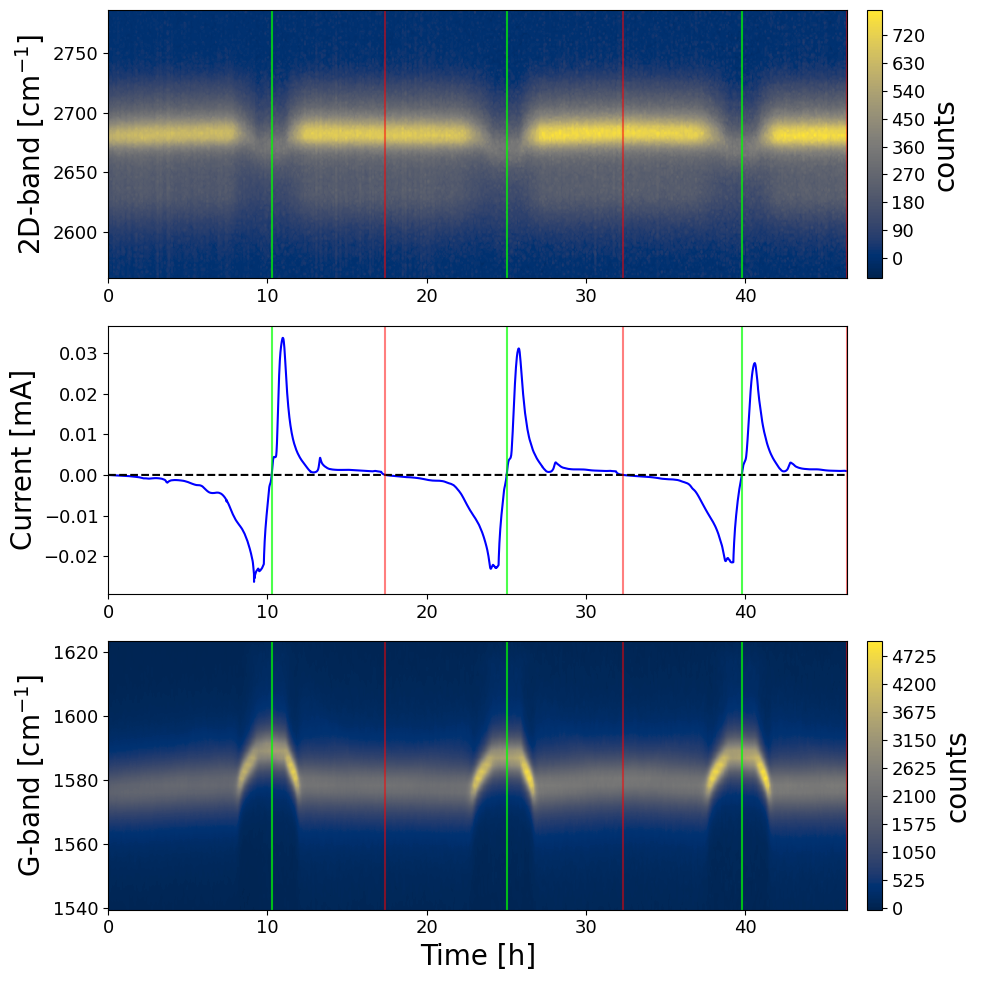

In [5]:
import matplotlib.gridspec as gridspec
plt.rcParams['font.size'] = 13
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 0.02])
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0], sharex=ax1)
ax3 = fig.add_subplot(gs[2,0], sharex=ax1)
axc1 = fig.add_subplot(gs[0,1])
axc2 = fig.add_subplot(gs[2,1])

ax = [ax1,ax2,ax3]
cont1 = ax[0].contourf(t_grid[:, splt_ind+move_split1:end_ind], nu_grid[:, splt_ind+move_split1:end_ind], counts_grid[:, splt_ind+move_split1:end_ind], cmap='cividis', levels=200)
cbar1 = plt.colorbar(cont1, cax=axc1)
cbar1.set_label('counts', fontsize=20)
cont2 = ax[2].contourf(t_grid[:, start_ind:splt_ind-move_split2], nu_grid[:, start_ind:splt_ind-move_split2], counts_grid[:, start_ind:splt_ind-move_split2], cmap='cividis', levels=200)
cbar2 = plt.colorbar(cont2, cax=axc2)
cbar2.set_label('counts', fontsize=20)

ax[1].plot(time/3600, current, color='blue')
ax[1].plot(time/3600, [0]*len(time), color='black', linestyle='--')



ylabels = [r'2D-band [cm$^{-1}$]', r'Current [mA]', r'G-band [cm$^{-1}$]']
for i in range(3):
    for j in range(3):
        ax[i].axvline(time_charged[j]/3600, color='lime', alpha=0.7)
        ax[i].axvline(time_discharged[j]/3600, color='red', alpha=0.5)
    ax[i].set_ylabel(ylabels[i], fontsize=20)
ax[2].set_xlabel(r'Time [h]', fontsize=20)
#plt.subplots_adjust(hspace=0.05)
plt.tight_layout()
plt.savefig(f'{DATA_DIR_RED}OverviewofRed.png')
plt.show()

119.98817043922716 120.49646030547136 117.14751220431758
193.82037886832617 154.64171170281247 144.05147875419925
0.6190689087484569 0.7791976626399427 0.8132336663076609


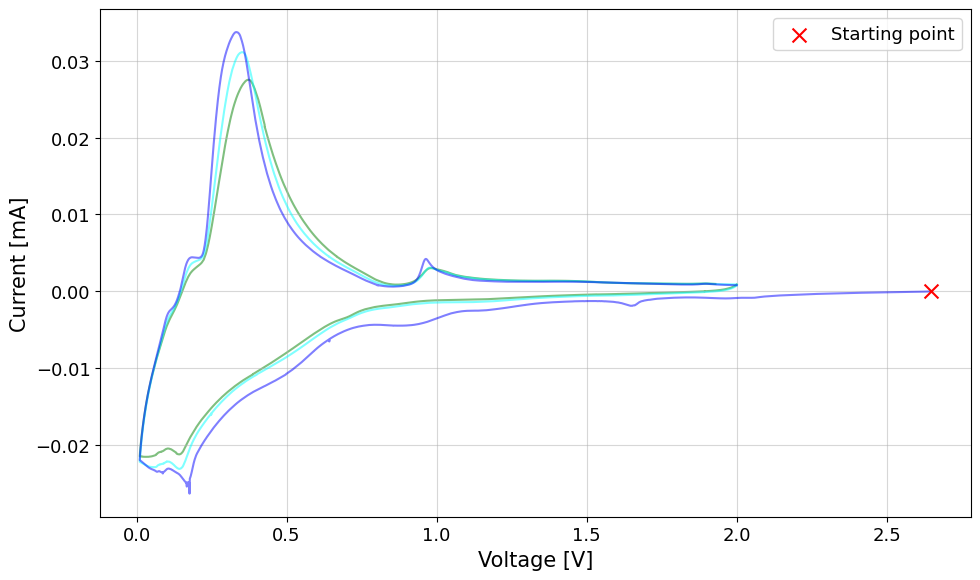

In [6]:
def integral(I, ind1, ind2, t=time):
    Q = np.sum(I[ind1:ind2]*(t[ind1+1:ind2+1]-t[ind1:ind2]))
    
    return np.abs(Q)

Q_c1 = integral(current, 0, charged_ind[0])
Q_d1 = integral(current, charged_ind[0], discharged_ind[0])
ratio1 = Q_d1/Q_c1

Q_c2 = integral(current, discharged_ind[0], charged_ind[1])
Q_d2 = integral(current, charged_ind[1], discharged_ind[1])
ratio2 = Q_d2/Q_c2

Q_c3 = integral(current, discharged_ind[1], charged_ind[2])
Q_d3 = integral(current, charged_ind[2], discharged_ind[2])
ratio3 = Q_d3/Q_c3
print(Q_d1, Q_d2, Q_d3)
print(Q_c1, Q_c2, Q_c3)
print(ratio1, ratio2, ratio3)

plt.figure(figsize=(10,6))

plt.plot(voltage[:vmax_ind[0]], current[:vmax_ind[0]], zorder=3, color='blue', alpha=0.5)

plt.plot(voltage[vmax_ind[0]:vmax_ind[1]], current[vmax_ind[0]:vmax_ind[1]], zorder=2, color='cyan', alpha=0.5)

plt.plot(voltage[vmax_ind[1]:vmax_ind[2]], current[vmax_ind[1]:vmax_ind[2]], zorder=1, color='green', alpha=0.5)

plt.scatter(voltage[0], current[0], label='Starting point', color='red', marker='x', s=100, zorder=5)
plt.xlabel(r'Voltage [V]', fontsize=15)
plt.ylabel(r'Current [mA]', fontsize=15)
plt.legend()
plt.grid(alpha=0.5, zorder=0)
plt.tight_layout()
#plt.savefig(f'{DATA_DIR_RED}CurrentoverVoltCycles.png')
plt.show()

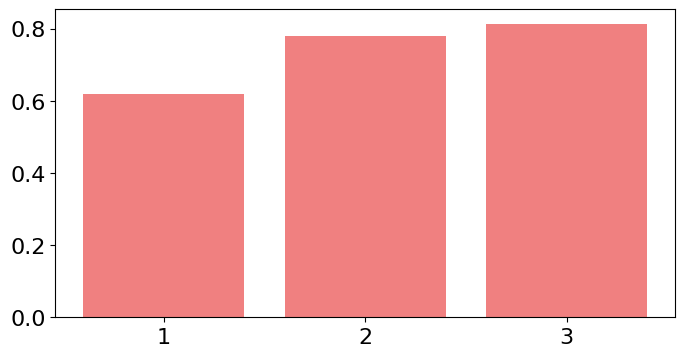

In [27]:
cycles = [1,2,3]
ces = [ratio1, ratio2, ratio3]
plt.figure(figsize=(8,4))
plt.bar(cycles, ces, color='LightCoral')
plt.xticks([1,2,3])
plt.show()

In [7]:
TwoD_position_path = f'{DATA_DIR_RED}2D_position_bkg_corrected.txt'
TwoD_height_path = f'{DATA_DIR_RED}2D_height_bkg_corrected.txt'
G_position_path = f'{DATA_DIR_RED}G_position_bkg_corrected.txt'
G_height_path = f'{DATA_DIR_RED}G_height_bkg_corrected.txt'

class Cursor:
    def __init__(self, positionpath, heightpath):
        self.dict = {}
        self.dict['time'] = []
        self.dict['position'] = []
        self.dict['height'] = []
        with open(positionpath, 'r') as file:
            for row in file:
                if row[0].isnumeric():
                    rowi = row.split('\t')
                    self.dict['time'].append(float(rowi[0]))
                    self.dict['position'].append(float(rowi[1]))
        with open(heightpath, 'r') as file:
            for row in file:
                if row[0].isnumeric():
                    rowi = row.split('\t')
                    self.dict['height'].append(float(rowi[1]))
    
    def get_time(self):
        return np.array(self.dict['time'])
    
    def get_position(self):
        return np.array(self.dict['position'])
    
    def get_height(self):
        return np.array(self.dict['height'])
    
    def set_height(self, array):
        self.dict['height'] = array

TwoD_cursor = Cursor(TwoD_position_path, TwoD_height_path)
G_cursor = Cursor(G_position_path, G_height_path)

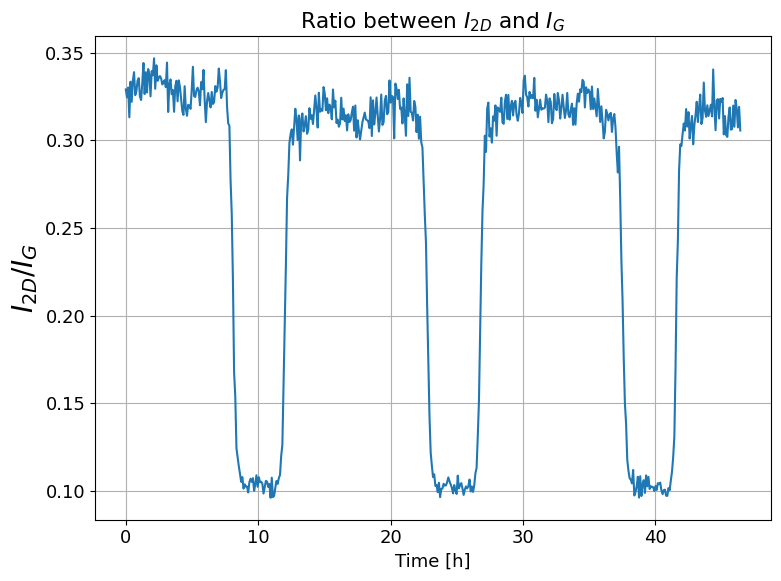

In [8]:
time = G_cursor.get_time()/3600
G_height = G_cursor.get_height()
TwoD_height = TwoD_cursor.get_height()
plt.rcParams['font.size'] = 13
plt.figure(figsize=(8,6))
plt.plot(time, TwoD_height/G_height)
plt.title(r'Ratio between $I_{2D}$ and $I_G$')
plt.ylabel(r'$I_{2D}/I_G$', fontsize = 20)
plt.xlabel(r'Time [h]')
plt.grid()
plt.tight_layout()
#plt.savefig(f'{DATA_DIR_RED}I2DIG_ratio_red.pdf')
plt.show()

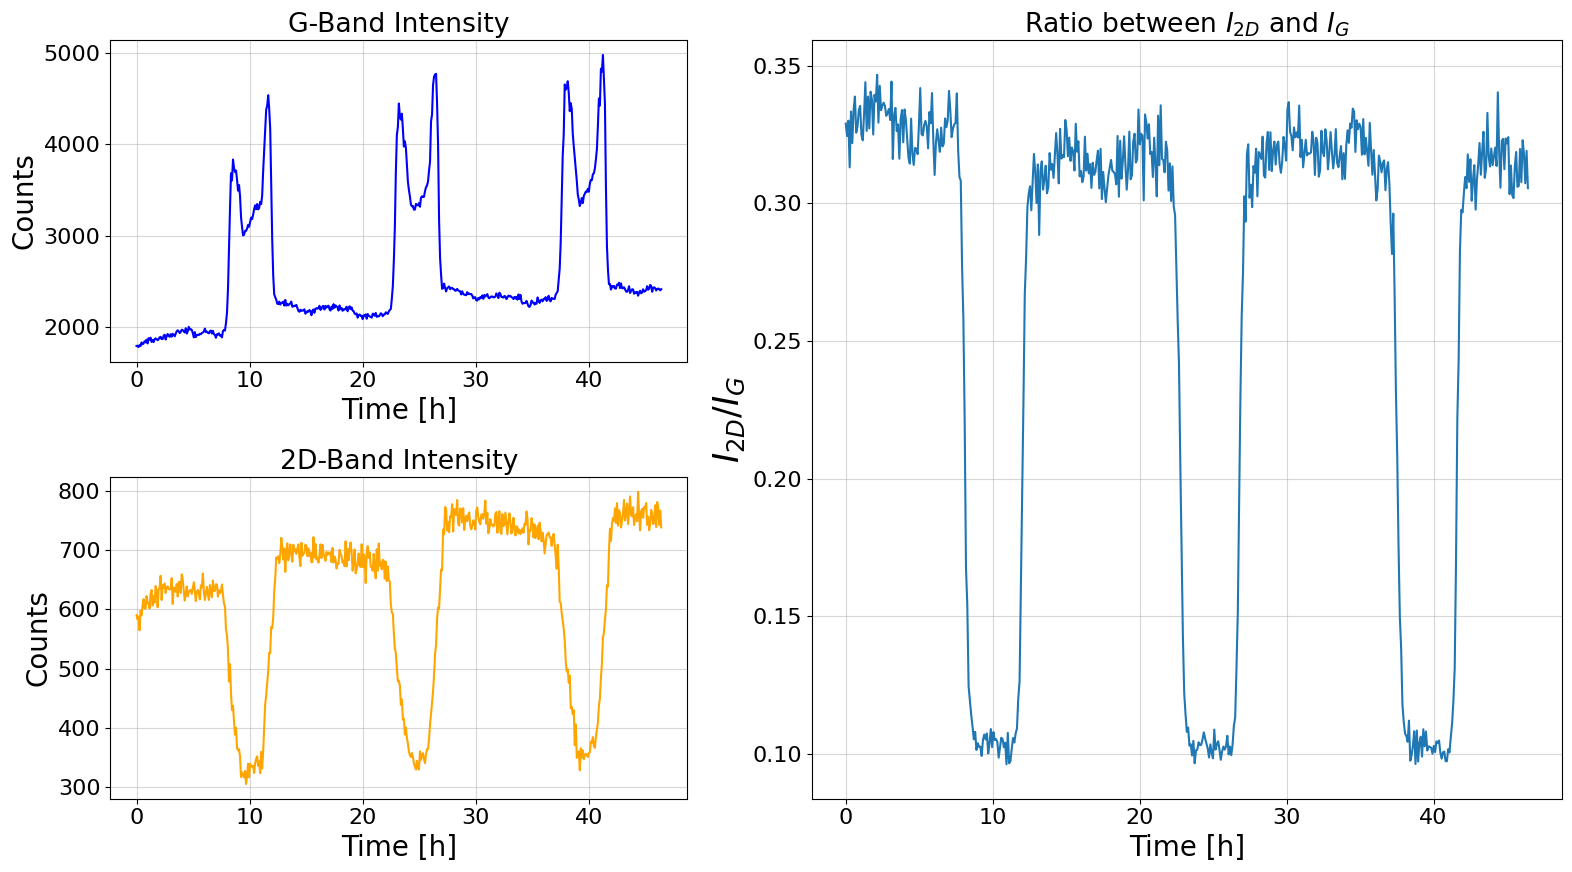

In [9]:
#fig, ax = plt.subplots(2, 2, figsize=(8,8), gridspec_kw={'height_ratios': [1,1]})
import matplotlib.gridspec as gridspec
#fig.delaxes(ax[1,1])
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(16, 9))


gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1.3])
ax1 = fig.add_subplot(gs[:,1])
ax1.plot(time, TwoD_height/G_height)
ax1.set_title(r'Ratio between $I_{2D}$ and $I_G$')
ax1.set_ylabel(r'$I_{2D}/I_G$', fontsize = 25)
ax1.set_xlabel(r'Time [h]', fontsize=20)
ax1.grid(alpha=0.5)

ax00 = fig.add_subplot(gs[0,0])
ax00.plot(time, G_height, color='blue')

ax01 = fig.add_subplot(gs[1,0])
ax01.plot(time, TwoD_height, color='orange')

axes = [ax00, ax01]
titles = ['G-Band Intensity', '2D-Band Intensity']
ylabel = 'Counts'
xlabel = 'Time [h]'

for i in range(2):
    axes[i].set_title(titles[i])
    axes[i].set_ylabel(ylabel, fontsize=20) 
    axes[i].set_xlabel(xlabel, fontsize=20)
    axes[i].grid(alpha=0.5)

plt.tight_layout()
plt.savefig(f'{DATA_DIR_RED}red_intensities.png')
plt.show()


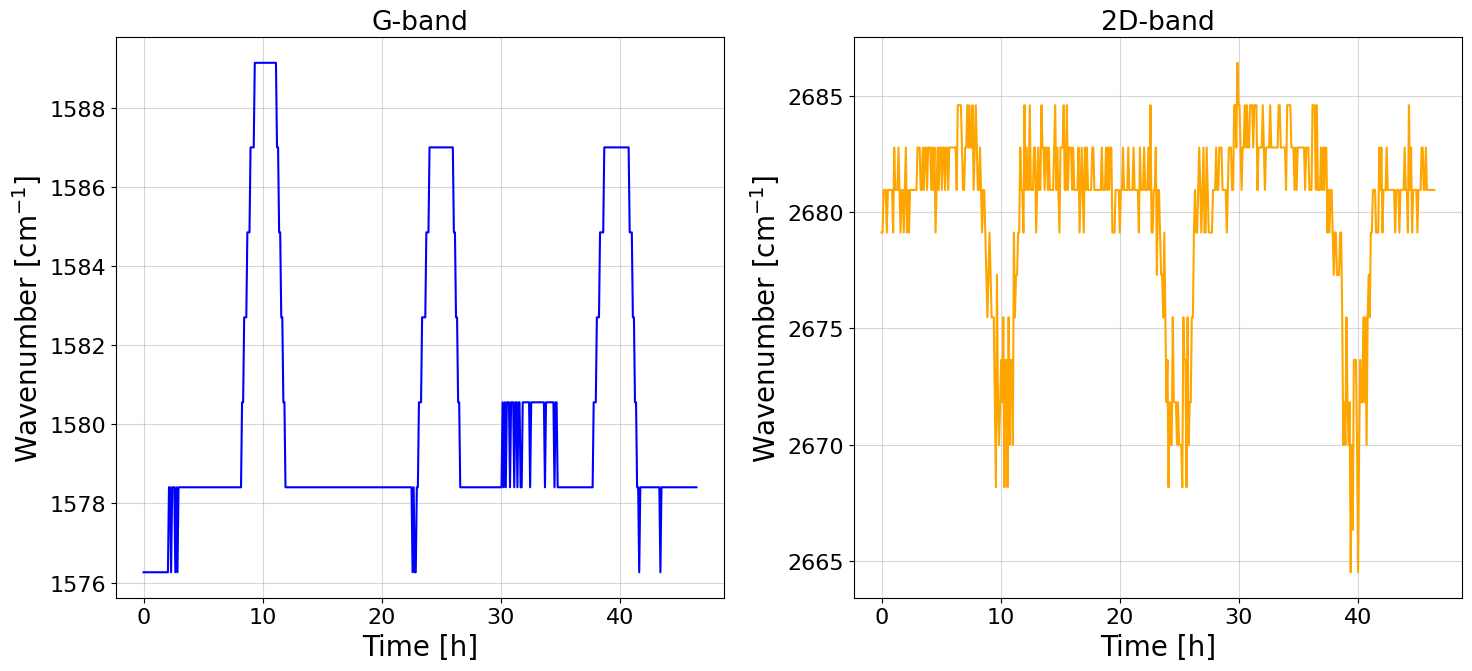

In [10]:
def smoothen(array, index=3):
    counter = 0
    new_array = np.zeros_like(array)
    for i in range(len(array)):
        if counter <= index:
            new_array[i] = np.mean(array[:i+index])
        elif counter >= len(array)-index:
            new_array[i] = np.mean(array[i-index:i+(len(array)-counter)])  
        else:
            new_array[i] = np.mean(array[i-index:i+index])
        counter += 1
    return new_array
G_position = G_cursor.get_position()
TwoD_position = TwoD_cursor.get_position()
positions = [G_position, TwoD_position]
titles = ['G-band', '2D-band']
colors = ['blue', 'orange']

fig, ax = plt.subplots(1, 2, figsize=(15,7))
for i in range(2):
    ax[i].plot(time, positions[i], colors[i])
    ax[i].set_title(titles[i])
    ax[i].set_ylabel(r'Wavenumber [cm$^{-1}$]', fontsize=20)
    ax[i].set_xlabel(r'Time [h]', fontsize=20)
    ax[i].grid(alpha=0.5)
plt.tight_layout()
plt.savefig(f'{DATA_DIR_RED}G2D_positions.png')
plt.show()

In [11]:
Bkg_corrected_blue_path = f'{DATA_DIR_BLUE}cor_operando_blue_25%_20x5.txt'
Operando_blue_path = f'{DATA_DIR_BLUE}Spectra_Operando.txt'
Electric_blue_path = f'{DATA_DIR_BLUE}V_A_20_cycles.txt'

Operando_blue = DataAnalysis(Operando_blue_path)
Operando_blue.set_counts(Bkg_corrected_blue_path)
Electric_blue = DataAnalysis(Electric_blue_path)

1457.49


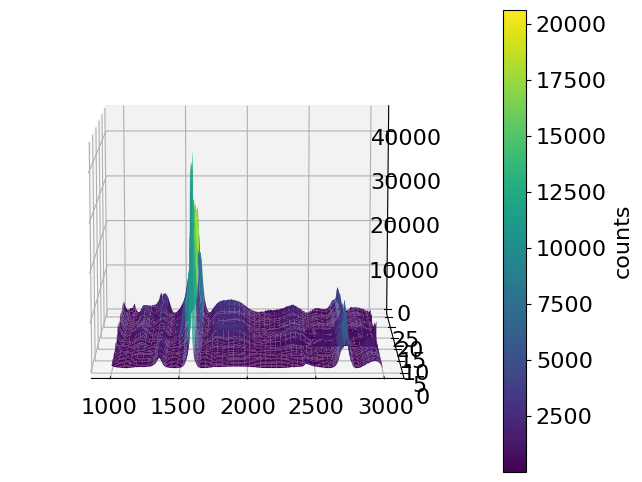

In [12]:
time_blue = Operando_blue.get_time()/3600
nu_blue = Operando_blue.get_wave()
counts_blue = Operando_blue.get_counts()
nub_grid, tb_grid = np.meshgrid(nu_blue, time_blue)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(nub_grid, tb_grid, counts_blue, cmap='viridis')
fig.colorbar(surf, label='counts')
ax.view_init(elev=10, azim=-90)

print(nu_blue[115])

In [13]:
TwoD_blue_height_path = f'{DATA_DIR_BLUE}2D_height.txt'
TwoD_blue_position_path = f'{DATA_DIR_BLUE}2D_position.txt'
G_blue_height_path = f'{DATA_DIR_BLUE}G_height.txt'
G_blue_position_path = f'{DATA_DIR_BLUE}G_position.txt'
D_blue_height_path = f'{DATA_DIR_BLUE}D_height.txt'
D_blue_position_path = f'{DATA_DIR_BLUE}D_position.txt'

TwoD_blue_cursor = Cursor(TwoD_blue_position_path, TwoD_blue_height_path)
G_blue_cursor = Cursor(G_blue_position_path, G_blue_height_path)
D_blue_cursor = Cursor(D_blue_position_path, D_blue_height_path)

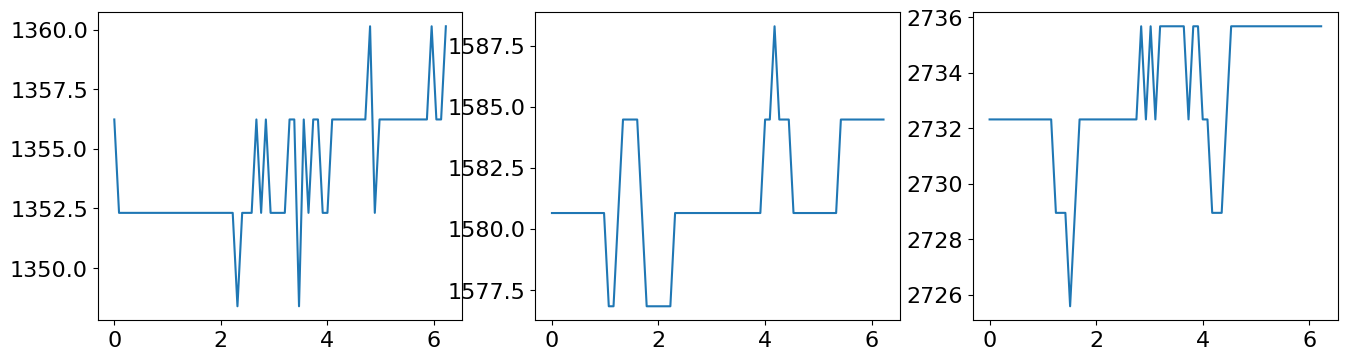

In [14]:
t_bc = D_blue_cursor.get_time()/3600
max_ind = -210
D_blue_position = D_blue_cursor.get_position()
G_blue_position = G_blue_cursor.get_position()
TwoD_blue_position = TwoD_blue_cursor.get_position()
positions = [D_blue_position[:max_ind], G_blue_position[:max_ind], TwoD_blue_position[:max_ind]]

fig, ax = plt.subplots(1,3, figsize=(16,4))
for i in range(3):
    ax[i].plot(t_bc[:max_ind], positions[i])
plt.show()

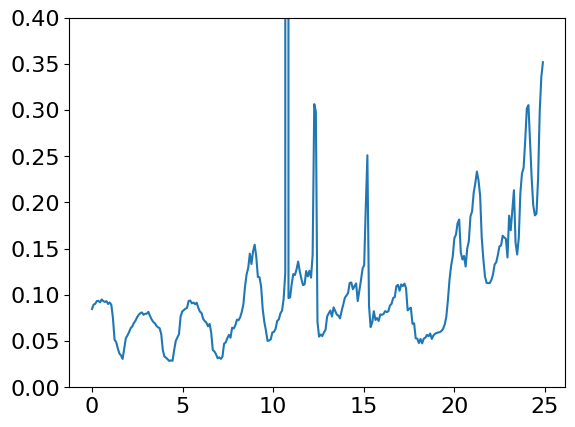

In [15]:
D_inds = (70,110)
G_inds = (120,160)
TwoD_inds = (425, 480)

# This is done because the height-data is not background corrected
D_interval = counts_blue[:, D_inds[0]:D_inds[1]]
G_interval = counts_blue[:, G_inds[0]:G_inds[1]]
TwoD_interval = counts_blue[:, TwoD_inds[0]:TwoD_inds[1]]

D_blue_height = D_interval.max(axis=1)
G_blue_height = G_interval.max(axis=1)
TwoD_blue_height = TwoD_interval.max(axis=1)

#plt.plot(t_bc, D_blue_height)#/G_blue_height)
plt.plot(t_bc, (D_blue_height/G_blue_height))#/G_blue_height))#[:100])
plt.ylim(0, 0.4)
plt.show()

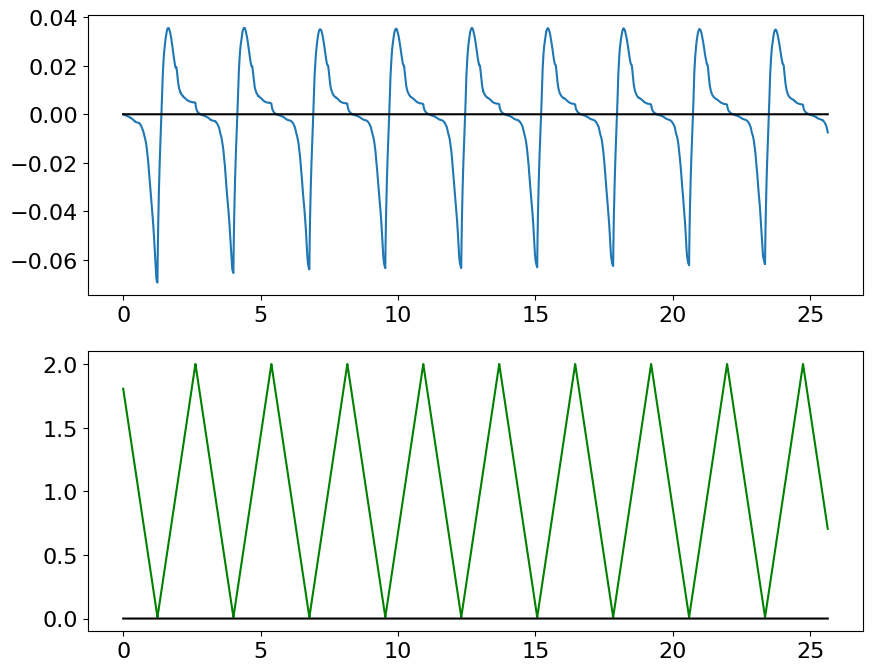

In [16]:
current_blue = Electric_blue.get_current()
voltage_blue = Electric_blue.get_volt()
time_elblue = Electric_blue.get_time()/3600

fig, ax = plt.subplots(2, 1, figsize=(10,8))
ax[0].plot(time_elblue, current_blue)
ax[1].plot(time_elblue, voltage_blue, color='green')

for i in range(2):
    ax[i].plot(time_elblue, [0]*len(time_elblue), color='black')

plt.show()

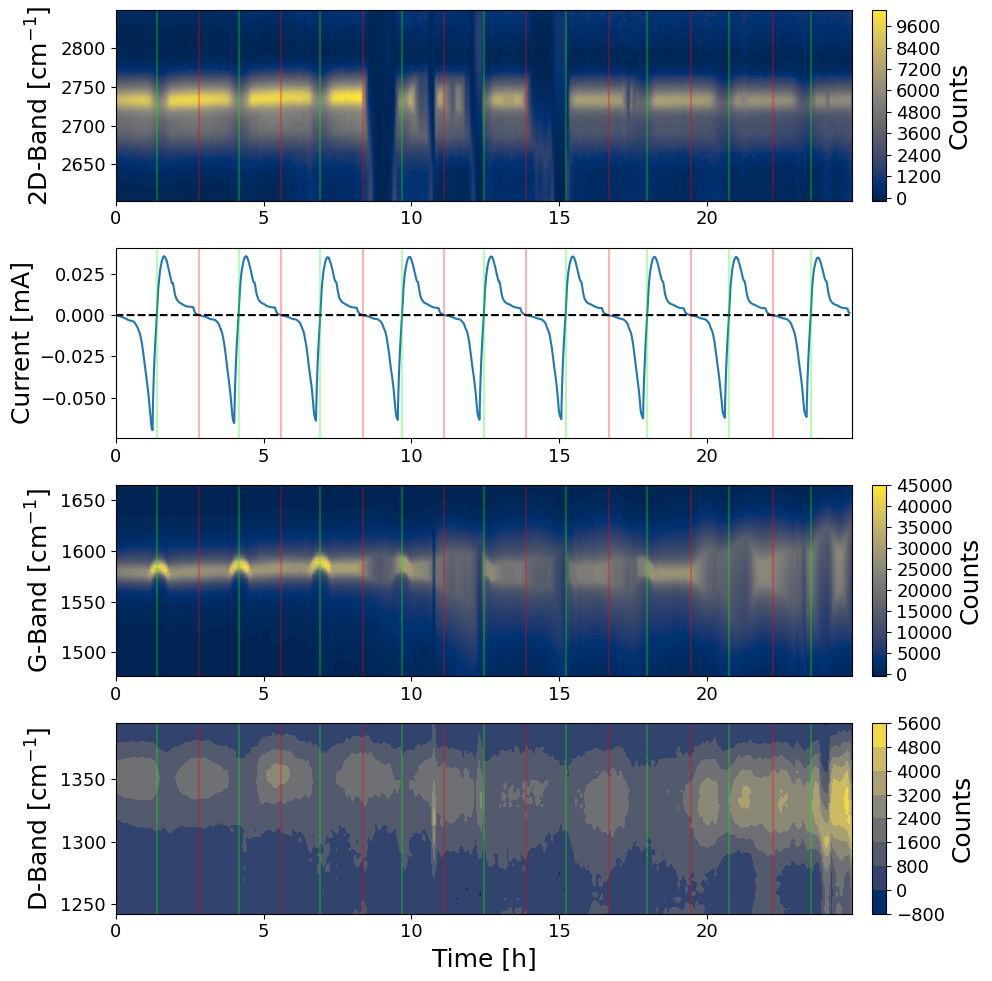

In [17]:
import matplotlib.gridspec as gridspec
plt.rcParams['font.size'] = 13
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 0.02])
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0], sharex=ax1)
ax3 = fig.add_subplot(gs[2,0], sharex=ax1)
ax4 = fig.add_subplot(gs[3,0], sharex=ax1)
axc0 = fig.add_subplot(gs[0,1])
axc2 = fig.add_subplot(gs[2,1])
axc3 = fig.add_subplot(gs[3,1])
ax = [ax1,ax2,ax3,ax4]

interval = 10000#int(len(current_blue)/19-5000)
charged_inds = [int(2*(i+0.1)*interval)+np.argmin(np.abs(current_blue[int(2*(i+0.1)*interval):int(2*(i+0.8)*interval)])) for i in range(0, 9)]
discharged_inds = [2*(i)*interval+np.argmin(np.abs(current_blue[2*(i)*interval:int(2*(i+0.4)*interval)])) for i in range(10)]
split_ind_DG = 100
split_ind_TwoDG = 400
colormap = 'cividis'
moveg1 = 20
moveg2 = -230
moved1 = 60
moved2 = 0
movetwod1 = 30
movetwod2 = 45
cutoff = -6000
countsfont=18

ax[3].set_xlabel('Time [h]', fontsize=18)
contr0 = ax[0].contourf(tb_grid[:, split_ind_TwoDG+movetwod1:-movetwod2], nub_grid[:, split_ind_TwoDG+movetwod1:-movetwod2], counts_blue[:, split_ind_TwoDG+movetwod1:-movetwod2], levels=100, cmap=colormap)
ax[1].plot(time_elblue[:cutoff], current_blue[:cutoff])
ax[1].plot(time_elblue[:cutoff], [0]*len(time_elblue[:cutoff]), color='black', linestyle='--')
contr2 = ax[2].contourf(tb_grid[:, split_ind_DG+moveg1:split_ind_TwoDG+moveg2], nub_grid[:, split_ind_DG+moveg1:split_ind_TwoDG+moveg2], counts_blue[:, split_ind_DG+moveg1:split_ind_TwoDG+moveg2], levels=100, cmap=colormap)
contr3 = ax[3].contourf(tb_grid[:, moved1:split_ind_DG+moved2], nub_grid[:, moved1:split_ind_DG+moved2], counts_blue[:, moved1:split_ind_DG+moved2], cmap=colormap)
cbar0 = fig.colorbar(contr0, cax=axc0)
cbar0.set_label('Counts', fontsize=countsfont)
cbar2 = fig.colorbar(contr2, cax=axc2)
cbar2.set_label('Counts', fontsize=countsfont)
cbar3 = fig.colorbar(contr3, cax=axc3)
cbar3.set_label('Counts', fontsize=countsfont)

for i in range(9):
    for j in range(4):
        ax[j].axvline(time_elblue[charged_inds[i]], color='lime', alpha=0.3)
        ax[j].axvline(time_elblue[discharged_inds[i]], color='red', alpha=0.3)
ylabels = [r'2D-Band [cm$^{-1}$]', r'Current [mA]', r'G-Band [cm$^{-1}$]', r'D-Band [cm$^{-1}$]']

for k in range(4):
    ax[k].set_ylabel(ylabels[k], fontsize=18)
plt.tight_layout()
plt.savefig(f'{DATA_DIR_BLUE}Blue_overview.png')
plt.show()

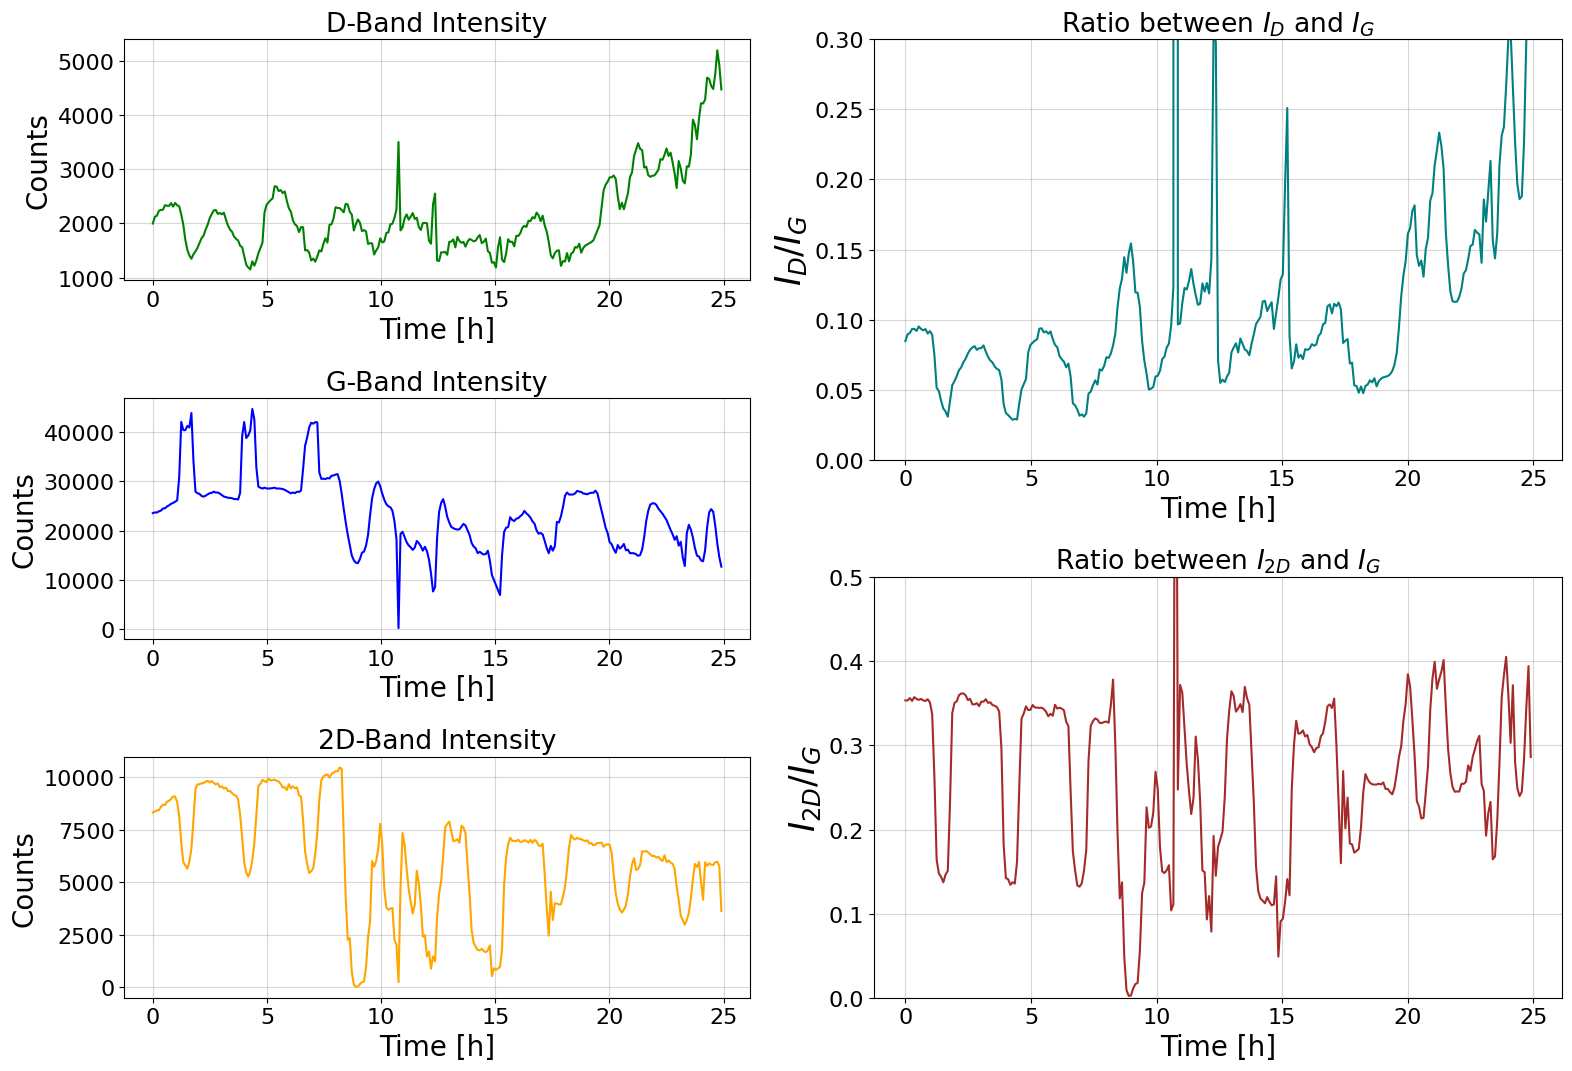

In [18]:

#fig, ax = plt.subplots(2, 2, figsize=(8,8), gridspec_kw={'height_ratios': [1,1]})
intensities = [D_blue_height, G_blue_height, TwoD_blue_height]
import matplotlib.gridspec as gridspec
#fig.delaxes(ax[1,1])
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(16, 11))

# Define the GridSpec with 2 columns and 3 rows (the number of rows can vary)
gs = gridspec.GridSpec(6, 2, width_ratios=[1, 1.1])

ax1 = fig.add_subplot(gs[:3,1])
ax2 = fig.add_subplot(gs[3:,1])

ax1.plot(time_blue, intensities[0]/intensities[1], color='teal')
ax1.set_ylim(0, 0.3)
ax1.grid(alpha=0.5)
ax1.set_title(r'Ratio between $I_D$ and $I_G$')
ax1.set_ylabel(r'$I_D/I_G$', fontsize=25)
ax1.set_xlabel('Time [h]', fontsize=20)

ax2.plot(time_blue, intensities[2]/intensities[1], color='brown')
ax2.set_ylim(0, 0.5)
ax2.grid(alpha=0.5)
ax2.set_title(r'Ratio between $I_{2D}$ and $I_G$')
ax2.set_ylabel(r'$I_{2D}/I_G$', fontsize=25)
ax2.set_xlabel('Time [h]', fontsize=20)

axd = fig.add_subplot(gs[0:2,0])
axg = fig.add_subplot(gs[2:4,0])
ax2d = fig.add_subplot(gs[4:,0])
ax = [axd,axg,ax2d]
colors = ['green', 'blue', 'orange']
titles = [r'D-Band Intensity', r'G-Band Intensity', r'2D-Band Intensity']
for i in range(3):
    ax[i].plot(time_blue, intensities[i], color=colors[i])
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('Counts', fontsize=20)
    ax[i].set_xlabel('Time [h]', fontsize=20)
    ax[i].grid(alpha=0.5)

plt.tight_layout()
plt.savefig(f'{DATA_DIR_BLUE}IDI2DIG_ratio_blue.png')
plt.show()

In [19]:

Charged_Q = [integral(current_blue, discharged_inds[i], charged_inds[i], time_elblue*3600) for i in range(9)]

Discharged_Q = [integral(current_blue, charged_inds[i], discharged_inds[i+1], time_elblue*3600) for i in range(8)]
Discharged_Q.append(integral(current_blue, charged_inds[-1], len(current_blue[:cutoff]), time_elblue*3600))

print(Charged_Q)
print(Discharged_Q)
print(np.array(Discharged_Q)/np.array(Charged_Q)*100)

[82.30276931447784, 76.63862937838257, 75.22323856305715, 74.98728845893517, 75.24216544619452, 75.09857771290734, 74.74261846472288, 74.32591109619172, 73.9006157988809]
[71.61728601402726, 71.80679009964709, 71.10406702013545, 71.1164043196938, 71.30599275606997, 71.1502740855103, 70.83119404728066, 70.46622278396765, 69.81896913460598]
[87.01686056 93.69529529 94.52407046 94.83794625 94.76866107 94.74250545
 94.76680842 94.80707568 94.4768435 ]
